<a href="https://colab.research.google.com/github/4k5h1t/Network-Anomaly-Detection/blob/main/Autoencoder_Model_for_Network_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.utils import class_weight

RANDOM_STATE_SEED = 12

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!kaggle datasets download -d solarmainframe/ids-intrusion-csv

100% 1.60G/1.60G [00:12<00:00, 129MB/s]
100% 1.60G/1.60G [00:12<00:00, 134MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  ids-intrusion-csv.zip
replace 02-14-2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Kaggle/02-14-2018.csv')
df = df.drop(['Timestamp'], axis=1)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046298 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1046298 non-null  int64  
 1   Protocol           1046298 non-null  int64  
 2   Flow Duration      1046298 non-null  int64  
 3   Tot Fwd Pkts       1046298 non-null  int64  
 4   Tot Bwd Pkts       1046298 non-null  int64  
 5   TotLen Fwd Pkts    1046298 non-null  int64  
 6   TotLen Bwd Pkts    1046298 non-null  int64  
 7   Fwd Pkt Len Max    1046298 non-null  int64  
 8   Fwd Pkt Len Min    1046298 non-null  int64  
 9   Fwd Pkt Len Mean   1046298 non-null  float64
 10  Fwd Pkt Len Std    1046298 non-null  float64
 11  Bwd Pkt Len Max    1046298 non-null  int64  
 12  Bwd Pkt Len Min    1046298 non-null  int64  
 13  Bwd Pkt Len Mean   1046298 non-null  float64
 14  Bwd Pkt Len Std    1046298 non-null  float64
 15  Flow Byts/s        1046298 non-n

In [ ]:
df['Label'].value_counts()

Benign            665355
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [ ]:
df.replace(to_replace=["FTP-BruteForce", "SSH-Bruteforce"], value="Malicious", inplace=True)
df1 = df[df["Label"] == "Benign"][:665000]
df2 = df[df["Label"] == "Malicious"][:380943]
df_equal = pd.concat([df1,df2], axis=0)
df_equal["Label"].value_counts()

Benign       665000
Malicious    380943
Name: Label, dtype: int64

In [ ]:
df_equal.replace(to_replace="Benign", value=0, inplace=True)
df_equal.replace(to_replace="Malicious", value=1, inplace=True)
df_equal.replace([np.inf, -np.inf], np.nan, inplace=True)
df_equal.dropna(inplace=True)
train = df_equal[df["Label"] == "Benign"]
train.shape

<ipython-input-26-dacb29b6481c>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = df_equal[df["Label"] == "Benign"]


(663454, 79)

In [ ]:
Xtrain = train.drop(['Label'], axis=1)
Ytrain = train['Label']
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)

In [ ]:
Y.value_counts()

1    380943
0    380110
Name: Label, dtype: int64

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE_SEED, shuffle=True)

In [ ]:
Xtrain.shape

(663454, 78)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers

import tensorflow.python.keras as keras

In [ ]:
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense

In [ ]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(78,)),
       
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate = 0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate = 0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(rate = 0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               10112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer = 'adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
model.fit(Xtrain, Ytrain, epochs=3,verbose=1, validation_data=(Xtest, Ytest))

Epoch 1/3


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/backend.py:5028: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


20733/20733 [==============================] - 67s 3ms/step - loss: 8.0229e-04 - binary_accuracy: 0.9998 - val_loss: 34.0516 - val_binary_accuracy: 0.4996
Epoch 2/3
20733/20733 [==============================] - 64s 3ms/step - loss: 6.9311e-11 - binary_accuracy: 1.0000 - val_loss: 40.1037 - val_binary_accuracy: 0.4996
Epoch 3/3
20733/20733 [==============================] - 57s 3ms/step - loss: 5.3294e-11 - binary_accuracy: 1.0000 - val_loss: 44.6471 - val_binary_accuracy: 0.4996


In [ ]:
predictions=(model.predict(Xtest) > 0.5).astype("int32")
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
print(accuracy_score(Ytest, predictions))

0.4995663904413182


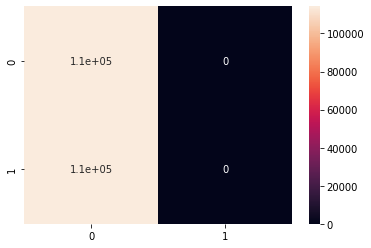

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Ytest, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Testing model with new dataset

In [ ]:
!kaggle datasets download -d solarmainframe/ids-intrusion-csv

In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Kaggle/03-02-2018.csv')
df = df.drop(['Timestamp'], axis=1)
df.dropna(inplace=True)
df.info()


In [ ]:
df.replace(to_replace="Bot", value="Malicious", inplace=True)
df1 = df[df["Label"] == "Benign"][:280000]
df2 = df[df["Label"] == "Malicious"][:280000]
df_equal2 = pd.concat([df1,df2], axis=0)
df_equal2.replace(to_replace="Benign", value=0, inplace=True)
df_equal2.replace(to_replace="Malicious", value=1, inplace=True)
df_equal2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_equal2.dropna(inplace=True)
df_equal2["Label"].value_counts()

In [ ]:
X = df_equal2.drop(['Label'], axis=1)
Y = df_equal2['Label']
Y.value_counts()

In [ ]:
predictions=(model.predict(X) > 0.5).astype("int32")

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(accuracy_score(Y, predictions))